<a href="https://colab.research.google.com/github/print-Shijay/pytorch-training/blob/main/test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [32]:
#create a class for model
class Model(nn.Module):
  #add a construction for the flow the data
  # in_features -> h1 -> h2 -> out_features
  def __init__ (self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2, out_features)

  #method to forward the data
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [33]:
#manual seed for randomization, any number
torch.manual_seed(41)
#create instance model
model = Model()

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/iris.csv'
my_df = pd.read_csv(url)

In [36]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [37]:
#change the values to int
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

/tmp/ipython-input-117867412.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [38]:
#train test split. set x y. Change the values to numpy
X = my_df.drop('species', axis=1).to_numpy()
y = my_df['species'].to_numpy()



In [39]:
from sklearn.model_selection import train_test_split

In [40]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [41]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [42]:
# Set a cruteruin if model for error (how far off the prediction are from)
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate
#(if error doest go down after a bunch of iteration (epochs), lower our learnign rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [45]:
#Train tghe model
#Epochs is one run thru all the training data in our network
epochs = 100
losses =[]
for i in range(epochs):
  #go forward and get a prediction
  y_pred = model.forward(X_train) #get predicted result

  #measure te loss/ error
  loss = criterion(y_pred, y_train) #predicted values vs y_train

  #keep track our losses
  losses.append(loss.detach().numpy())

  #print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  #Do some back progetaiont : take the error rate of forward propogation
  #and feed it back to the netwoerk to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 0.05286872386932373
Epoch: 10 and loss: 0.04508009925484657
Epoch: 20 and loss: 0.03979312628507614
Epoch: 30 and loss: 0.03596428409218788
Epoch: 40 and loss: 0.033028002828359604
Epoch: 50 and loss: 0.030512504279613495
Epoch: 60 and loss: 0.027733495458960533
Epoch: 70 and loss: 0.02461206540465355
Epoch: 80 and loss: 0.021672343835234642
Epoch: 90 and loss: 0.019320344552397728


Text(0.5, 0, 'Epochs')

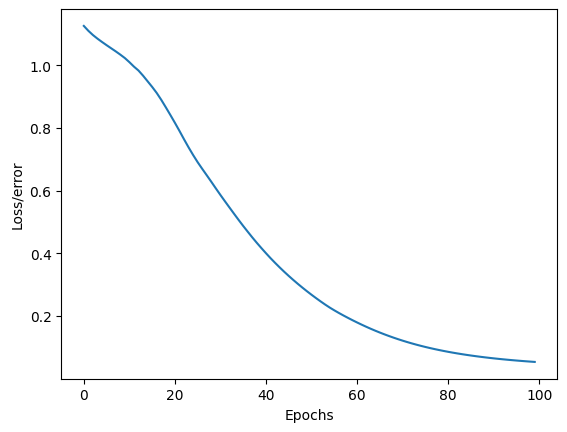

In [44]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss/error")
plt.xlabel("Epochs")